In [50]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("Yeast.csv")
df.head()

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.08,0.39,-0.17,0.23,0.20,0.20,-0.17,-0.69,0.14,-0.27
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,0.36,-0.20,-0.34,-0.14,-0.09,0.06,-0.17,0.04,-0.97,-1.79
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,0.21,-0.29,-0.36,-0.10,-0.29,-0.18,-0.34,-0.47,-0.43,-1.06
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.01,-0.29,0.31,0.21,0.07,0.18,-0.14,-0.20,-0.43,-1.51
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,NaN,-0.30,0.49,0.08,0.19,...,0.28,-0.17,0.26,0.07,-0.17,NaN,-0.10,-0.23,-0.51,-1.40


In [52]:
df.keys()

Index(['ORF', 'NAME', 'alpha0', 'alpha7', 'alpha14', 'alpha21', 'alpha28',
       'alpha35', 'alpha42', 'alpha49', 'alpha56', 'alpha63', 'alpha 70',
       'alpha 77', 'alpha 84', 'alpha91', 'alpha98', 'alpha 105', 'alpha 112',
       'alpha 119', 'Elu 0', 'Elu 30', 'Elu 60', 'Elu 90', 'Elu 120',
       'Elu 150', 'Elu 180', 'Elu 210', 'Elu 240', 'Elu 270', 'Elu 300',
       'Elu 330', 'Elu 360', 'Elu 390', 'cdc15 10', 'cdc15 30', 'cdc15 50',
       'cdc15 70', 'cdc15 90', 'cdc15 110', 'cdc15 130', 'cdc15 150',
       'cdc15 170', 'cdc15 190', 'cdc15 210', 'cdc15 230', 'cdc15 250',
       'cdc15 270', 'cdc15 290', 'spo 0', 'spo 2', 'spo 5', 'spo 7', 'spo 9',
       'spo 11', 'spo5 2', 'spo5 7', 'spo5 11', 'spo- early', 'spo- mid',
       'heat 0', 'heat 10', 'heat 20', 'heat 40', 'heat 80', 'heat 160',
       'dtt 15', 'dtt 30', 'dtt 60', 'dtt 120', 'cold 0', 'cold 20', 'cold 40',
       'cold 160', 'diau a', 'diau b', 'diau c', 'diau d', 'diau e', 'diau f',
       'diau g'],
      dty

In [53]:
print(df.shape)

(87, 81)


In [54]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(100) #in the bracket means row

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.08,0.39,-0.17,0.23,0.20,0.20,-0.17,-0.69,0.14,-0.27
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,0.36,-0.20,-0.34,-0.14,-0.09,0.06,-0.17,0.04,-0.97,-1.79
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,0.21,-0.29,-0.36,-0.10,-0.29,-0.18,-0.34,-0.47,-0.43,-1.06
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.01,-0.29,0.31,0.21,0.07,0.18,-0.14,-0.20,-0.43,-1.51
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,NaN,-0.30,0.49,0.08,0.19,...,0.28,-0.17,0.26,0.07,-0.17,NaN,-0.10,-0.23,-0.51,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,YNR058W,BIO3 BIOTIN BIOSYNTHESIS DAPA AMINOTRAN...,-0.23,-0.27,-0.06,-0.38,-0.30,-0.23,NaN,-0.23,...,0.58,0.11,0.72,-0.42,-0.69,-0.56,-0.43,-0.94,NaN,-0.58
83,YPR106W,ISR1 STAUROSPORINE RESISTANCE PROTEIN KINASE,-1.12,-0.79,-1.32,-1.06,-0.56,-0.09,-0.47,-0.84,...,-0.04,0.24,0.23,0.16,0.32,0.79,-0.03,-0.09,0.61,0.21
84,YDR362C,TFC6 TRANSCRIPTION TFIIIC 91 KD S...,-0.36,-0.79,-0.29,-0.42,-0.22,-0.69,-0.34,-0.42,...,0.71,-0.09,0.50,-0.32,-0.25,0.39,-0.03,-0.22,0.43,0.25
85,YOR237W,HES1 STEROL METABOLISM SIMILAR TO HUM...,-0.14,-0.69,-0.18,0.01,0.24,0.50,0.30,NaN,...,-0.40,-0.32,-0.01,-0.67,-0.12,0.52,-0.42,-0.14,0.55,0.46


In [55]:
new_df = df.fillna(0)
new_df

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.08,0.39,-0.17,0.23,0.20,0.20,-0.17,-0.69,0.14,-0.27
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,0.36,-0.20,-0.34,-0.14,-0.09,0.06,-0.17,0.04,-0.97,-1.79
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,0.21,-0.29,-0.36,-0.10,-0.29,-0.18,-0.34,-0.47,-0.43,-1.06
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.01,-0.29,0.31,0.21,0.07,0.18,-0.14,-0.20,-0.43,-1.51
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,0.00,-0.30,0.49,0.08,0.19,...,0.28,-0.17,0.26,0.07,-0.17,0.00,-0.10,-0.23,-0.51,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,YNR058W,BIO3 BIOTIN BIOSYNTHESIS DAPA AMINOTRAN...,-0.23,-0.27,-0.06,-0.38,-0.30,-0.23,0.00,-0.23,...,0.58,0.11,0.72,-0.42,-0.69,-0.56,-0.43,-0.94,0.00,-0.58
83,YPR106W,ISR1 STAUROSPORINE RESISTANCE PROTEIN KINASE,-1.12,-0.79,-1.32,-1.06,-0.56,-0.09,-0.47,-0.84,...,-0.04,0.24,0.23,0.16,0.32,0.79,-0.03,-0.09,0.61,0.21
84,YDR362C,TFC6 TRANSCRIPTION TFIIIC 91 KD S...,-0.36,-0.79,-0.29,-0.42,-0.22,-0.69,-0.34,-0.42,...,0.71,-0.09,0.50,-0.32,-0.25,0.39,-0.03,-0.22,0.43,0.25
85,YOR237W,HES1 STEROL METABOLISM SIMILAR TO HUM...,-0.14,-0.69,-0.18,0.01,0.24,0.50,0.30,0.00,...,-0.40,-0.32,-0.01,-0.67,-0.12,0.52,-0.42,-0.14,0.55,0.46


Fill na using column names and dict

In [62]:
new_df = df.fillna({
      'alpha0':0, 'alpha7':0, 'alpha14':0, 'alpha21':0, 'alpha28':0,
       'alpha35':0, 'alpha42':0, 'alpha49':0, 'alpha56':0, 'alpha63':0, 'alpha 70':0,
       'alpha 77':0, 'alpha 84':0, 'alpha91':0, 'alpha98':0, 'alpha 105':0,
       'alpha 112':0, 'alpha 119':0, 'Elu 0':0, 'Elu 30':0, 'Elu 60':0, 'Elu 90':0,
       'Elu 120':0, 'Elu 150':0, 'Elu 180':0, 'Elu 210':0, 'Elu 240':0, 'Elu 270':0,
       'Elu 300':0, 'Elu 330':0, 'Elu 360':0, 'Elu 390':0, 'cdc15 10':0, 'cdc15 30':0,
       'cdc15 50':0, 'cdc15 70':0, 'cdc15 90':0, 'cdc15 110':0, 'cdc15 130':0,
       'cdc15 150':0, 'cdc15 170':0, 'cdc15 190':0, 'cdc15 210':0, 'cdc15 230':0,
       'cdc15 250':0, 'cdc15 270':0, 'cdc15 290':0, 'spo 0':0, 'spo 2':0, 'spo 5':0,
       'spo 7':0, 'spo 9':0, 'spo 11':0, 'spo5 2':0, 'spo5 7':0, 'spo5 11':0, 'spo- early':0,
       'spo- mid':0, 'heat 0':0, 'heat 10':0, 'heat 20':0, 'heat 40':0, 'heat 80':0,
       'heat 160':0, 'dtt 15':0, 'dtt 30':0, 'dtt 60':0, 'dtt 120':0, 'cold 0':0,
       'cold 20':0, 'cold 40':0, 'cold 160':0, 'diau a':0, 'diau b':0, 'diau c':0,
       'diau d':0, 'diau e':0, 'diau f':0, 'diau g':0  
    })
new_df

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.08,0.39,-0.17,0.23,0.20,0.20,-0.17,-0.69,0.14,-0.27
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,0.36,-0.20,-0.34,-0.14,-0.09,0.06,-0.17,0.04,-0.97,-1.79
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,0.21,-0.29,-0.36,-0.10,-0.29,-0.18,-0.34,-0.47,-0.43,-1.06
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.01,-0.29,0.31,0.21,0.07,0.18,-0.14,-0.20,-0.43,-1.51
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,0.00,-0.30,0.49,0.08,0.19,...,0.28,-0.17,0.26,0.07,-0.17,0.00,-0.10,-0.23,-0.51,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,YNR058W,BIO3 BIOTIN BIOSYNTHESIS DAPA AMINOTRAN...,-0.23,-0.27,-0.06,-0.38,-0.30,-0.23,0.00,-0.23,...,0.58,0.11,0.72,-0.42,-0.69,-0.56,-0.43,-0.94,0.00,-0.58
83,YPR106W,ISR1 STAUROSPORINE RESISTANCE PROTEIN KINASE,-1.12,-0.79,-1.32,-1.06,-0.56,-0.09,-0.47,-0.84,...,-0.04,0.24,0.23,0.16,0.32,0.79,-0.03,-0.09,0.61,0.21
84,YDR362C,TFC6 TRANSCRIPTION TFIIIC 91 KD S...,-0.36,-0.79,-0.29,-0.42,-0.22,-0.69,-0.34,-0.42,...,0.71,-0.09,0.50,-0.32,-0.25,0.39,-0.03,-0.22,0.43,0.25
85,YOR237W,HES1 STEROL METABOLISM SIMILAR TO HUM...,-0.14,-0.69,-0.18,0.01,0.24,0.50,0.30,0.00,...,-0.40,-0.32,-0.01,-0.67,-0.12,0.52,-0.42,-0.14,0.55,0.46


In [57]:
new_df = df.dropna()
new_df

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
12,YCR040W,ALPHA1 TRANSCRIPTION ALPHA-SPECIFIC...,-0.29,0.31,-0.20,-0.04,-0.38,0.11,-0.20,-0.40,...,-0.09,0.04,-0.06,-0.69,0.66,-0.22,-0.62,-0.74,0.20,0.04
22,YPR149W,"NCE102 SECRETION, NON-CLASSICAL UNKNOWN",-2.84,-1.47,-0.94,-1.79,-1.47,-1.74,-0.20,-0.34,...,-0.17,-0.58,-0.69,0.16,0.11,0.39,0.81,0.92,2.03,2.29
40,YDR204W,COQ4 UBIQUINONE BIOSYNTHESIS UNKNOWN,-0.06,0.20,0.04,-0.22,-0.30,-0.54,-0.17,-0.67,...,0.19,0.28,-0.06,-0.56,0.16,0.03,-0.30,-0.10,0.80,0.30
44,YIL111W,COX5B OXIDATIVE PHOSPHORYLATIO CYTOCHROME-C O...,-0.01,0.32,0.56,0.41,0.33,0.20,0.14,-0.34,...,0.12,0.08,-0.62,-0.09,0.14,0.68,1.10,1.46,2.99,1.08
46,YKL142W,MRP8 PROTEIN SYNTHESIS RIBOSOMAL PROT...,0.10,0.56,0.39,-0.58,-0.29,-0.34,-0.20,-0.42,...,0.99,0.19,-0.40,-0.06,0.23,0.23,0.50,1.02,2.48,1.14
47,YOR089C,VPS21 ENDOCYTOSIS RAB5-LIKE GTPASE,0.11,-0.20,-0.01,-0.09,-0.27,0.34,0.06,-0.03,...,-0.15,-0.79,-0.12,0.06,0.07,0.07,-0.34,0.25,1.73,0.72
52,YER042W,NONE OXIDATIVE STRESS RESPONS PEPTIDE-METHIO...,-0.29,1.10,-0.20,-0.06,-0.42,0.44,0.32,0.70,...,0.15,-0.03,-0.23,-0.04,-0.03,0.18,-0.42,-0.51,0.10,-0.74
65,YDR440W,"PCH1 MEIOSIS, CHECKPOINT PUTATIVE ATPASE",-0.38,-0.18,-0.14,0.26,0.15,0.03,-0.14,-0.03,...,0.59,0.63,0.93,-0.25,-0.30,-0.15,-0.32,-0.40,-0.54,-1.32
66,YER114C,BOI2 BUD EMERGENCE BINDS BEM1P,-0.58,-0.23,-0.84,-0.27,-0.09,0.11,-0.17,0.08,...,0.16,0.57,0.92,0.08,-0.04,-0.18,-0.38,-0.40,-0.67,-0.74
68,YAL043C,PTA1 TRNA PROCESSING UNKNOWN,-0.20,-0.17,-0.15,-0.34,-0.29,-0.36,0.07,-0.25,...,0.69,1.36,0.74,0.03,-0.10,-0.62,-1.15,-0.62,-1.12,-0.40


In [58]:
missing_data = df.isnull()
missing_data.head(100)

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
83,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [59]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ORF
False    87
Name: ORF, dtype: int64

NAME
False    87
Name: NAME, dtype: int64

alpha0
False    85
True      2
Name: alpha0, dtype: int64

alpha7
False    83
True      4
Name: alpha7, dtype: int64

alpha14
False    85
True      2
Name: alpha14, dtype: int64

alpha21
False    83
True      4
Name: alpha21, dtype: int64

alpha28
False    86
True      1
Name: alpha28, dtype: int64

alpha35
False    86
True      1
Name: alpha35, dtype: int64

alpha42
False    81
True      6
Name: alpha42, dtype: int64

alpha49
False    83
True      4
Name: alpha49, dtype: int64

alpha56
False    83
True      4
Name: alpha56, dtype: int64

alpha63
False    86
True      1
Name: alpha63, dtype: int64

alpha 70
False    84
True      3
Name: alpha 70, dtype: int64

alpha 77
False    86
True      1
Name: alpha 77, dtype: int64

alpha 84
False    85
True      2
Name: alpha 84, dtype: int64

alpha91
False    87
Name: alpha91, dtype: int64

alpha98
False    87
Name: alpha98, dtype: int64

alpha 105
False    83
T

In [60]:
print(df.describe())

          alpha0     alpha7    alpha14    alpha21    alpha28    alpha35  \
count  85.000000  83.000000  85.000000  83.000000  86.000000  86.000000   
mean   -0.230000  -0.135663  -0.174706  -0.126867  -0.182209  -0.083721   
std     0.413254   0.443394   0.366644   0.382096   0.300577   0.347099   
min    -2.840000  -1.470000  -1.320000  -1.790000  -1.470000  -1.740000   
25%    -0.360000  -0.340000  -0.360000  -0.340000  -0.355000  -0.285000   
50%    -0.180000  -0.140000  -0.180000  -0.090000  -0.190000  -0.090000   
75%     0.010000   0.120000   0.040000   0.080000   0.030000   0.175000   
max     0.500000   1.100000   0.560000   0.820000   0.330000   0.540000   

         alpha42    alpha49    alpha56    alpha63  ...    cold 20    cold 40  \
count  81.000000  83.000000  83.000000  86.000000  ...  84.000000  85.000000   
mean   -0.088025  -0.150000  -0.076627  -0.135814  ...   0.231667   0.122706   
std     0.227434   0.302232   0.287034   0.273408  ...   0.486440   0.536056   
min 

In [63]:
# Mark invalid zero values as NaN (null)
temp_cols = ['ORF', 'NAME', 'alpha0', 'alpha7', 'alpha14', 'alpha21', 'alpha28',
       'alpha35', 'alpha42', 'alpha49', 'alpha56', 'alpha63', 'alpha 70',
       'alpha 77', 'alpha 84', 'alpha91', 'alpha98', 'alpha 105', 'alpha 112',
       'alpha 119', 'Elu 0', 'Elu 30', 'Elu 60', 'Elu 90', 'Elu 120',
       'Elu 150', 'Elu 180', 'Elu 210', 'Elu 240', 'Elu 270', 'Elu 300',
       'Elu 330', 'Elu 360', 'Elu 390', 'cdc15 10', 'cdc15 30', 'cdc15 50',
       'cdc15 70', 'cdc15 90', 'cdc15 110', 'cdc15 130', 'cdc15 150',
       'cdc15 170', 'cdc15 190', 'cdc15 210', 'cdc15 230', 'cdc15 250',
       'cdc15 270', 'cdc15 290', 'spo 0', 'spo 2', 'spo 5', 'spo 7', 'spo 9',
       'spo 11', 'spo5 2', 'spo5 7', 'spo5 11', 'spo- early', 'spo- mid',
       'heat 0', 'heat 10', 'heat 20', 'heat 40', 'heat 80', 'heat 160',
       'dtt 15', 'dtt 30', 'dtt 60', 'dtt 120', 'cold 0', 'cold 20', 'cold 40',
       'cold 160', 'diau a', 'diau b', 'diau c', 'diau d', 'diau e', 'diau f',
       'diau g']  
df[temp_cols] = df[temp_cols].replace(0, np.nan)
print(df.isnull().sum())

ORF        0
NAME       0
alpha0     2
alpha7     4
alpha14    2
          ..
diau c     5
diau d     2
diau e     2
diau f     2
diau g     4
Length: 81, dtype: int64


In [65]:
from sklearn.impute import SimpleImputer

# Define X and y
X = df[df.columns[2:81]]
y = df.columns[1]
print('----- This is X -----\n')
print(X)
print('----- This is y -----\n')
print(y)

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X[['alpha0', 'alpha7', 'alpha14', 'alpha21', 'alpha28',
       'alpha35', 'alpha42', 'alpha49', 'alpha56', 'alpha63', 'alpha 70',
       'alpha 77', 'alpha 84', 'alpha91', 'alpha98', 'alpha 105', 'alpha 112',
       'alpha 119', 'Elu 0', 'Elu 30', 'Elu 60', 'Elu 90', 'Elu 120',
       'Elu 150', 'Elu 180', 'Elu 210', 'Elu 240', 'Elu 270', 'Elu 300',
       'Elu 330', 'Elu 360', 'Elu 390', 'cdc15 10', 'cdc15 30', 'cdc15 50',
       'cdc15 70', 'cdc15 90', 'cdc15 110', 'cdc15 130', 'cdc15 150',
       'cdc15 170', 'cdc15 190', 'cdc15 210', 'cdc15 230', 'cdc15 250',
       'cdc15 270', 'cdc15 290', 'spo 0', 'spo 2', 'spo 5', 'spo 7', 'spo 9',
       'spo 11', 'spo5 2', 'spo5 7', 'spo5 11', 'spo- early', 'spo- mid',
       'heat 0', 'heat 10', 'heat 20', 'heat 40', 'heat 80', 'heat 160',
       'dtt 15', 'dtt 30', 'dtt 60', 'dtt 120', 'cold 0', 'cold 20', 'cold 40',
       'cold 160', 'diau a', 'diau b', 'diau c', 'diau d', 'diau e', 'diau f',
       'diau g']].describe())

# Define imputer
imputer = SimpleImputer(strategy='mean') 

# Use mean, median, or constant for numeric 
# Use most_frequent for categorical

# Fit on the dataset
imputer.fit(X)

# Transform the dataset
Xtrans = imputer.transform(X)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans, columns=X.columns)[[ 'alpha0', 'alpha7', 'alpha14', 'alpha21', 'alpha28',
       'alpha35', 'alpha42', 'alpha49', 'alpha56', 'alpha63', 'alpha 70',
       'alpha 77', 'alpha 84', 'alpha91', 'alpha98', 'alpha 105', 'alpha 112',
       'alpha 119', 'Elu 0', 'Elu 30', 'Elu 60', 'Elu 90', 'Elu 120',
       'Elu 150', 'Elu 180', 'Elu 210', 'Elu 240', 'Elu 270', 'Elu 300',
       'Elu 330', 'Elu 360', 'Elu 390', 'cdc15 10', 'cdc15 30', 'cdc15 50',
       'cdc15 70', 'cdc15 90', 'cdc15 110', 'cdc15 130', 'cdc15 150',
       'cdc15 170', 'cdc15 190', 'cdc15 210', 'cdc15 230', 'cdc15 250',
       'cdc15 270', 'cdc15 290', 'spo 0', 'spo 2', 'spo 5', 'spo 7', 'spo 9',
       'spo 11', 'spo5 2', 'spo5 7', 'spo5 11', 'spo- early', 'spo- mid',
       'heat 0', 'heat 10', 'heat 20', 'heat 40', 'heat 80', 'heat 160',
       'dtt 15', 'dtt 30', 'dtt 60', 'dtt 120', 'cold 0', 'cold 20', 'cold 40',
       'cold 160', 'diau a', 'diau b', 'diau c', 'diau d', 'diau e', 'diau f',
       'diau g' ]].describe())

----- This is X -----

    alpha0  alpha7  alpha14  alpha21  alpha28  alpha35  alpha42  alpha49  \
0     0.33   -0.17     0.04    -0.07    -0.09    -0.12    -0.03    -0.20   
1    -0.64   -0.38    -0.32    -0.29    -0.22    -0.01    -0.32    -0.27   
2    -0.23    0.19    -0.36     0.14    -0.40     0.16    -0.09    -0.12   
3    -0.69   -0.89    -0.74    -0.56    -0.64    -0.18    -0.42    -0.34   
4     0.04    0.01    -0.81      NaN    -0.30     0.49     0.08     0.19   
..     ...     ...      ...      ...      ...      ...      ...      ...   
82   -0.23   -0.27    -0.06    -0.38    -0.30    -0.23      NaN    -0.23   
83   -1.12   -0.79    -1.32    -1.06    -0.56    -0.09    -0.47    -0.84   
84   -0.36   -0.79    -0.29    -0.42    -0.22    -0.69    -0.34    -0.42   
85   -0.14   -0.69    -0.18     0.01     0.24     0.50     0.30      NaN   
86   -1.09     NaN    -0.56    -0.25    -0.47    -0.49    -0.49    -0.74   

    alpha56  alpha63  ...  cold 20  cold 40  cold 160  diau a  d

In [66]:
scaler = MinMaxScaler()

scaler.fit(df[['alpha91']])
df['alpha91'] = scaler.transform(df[['alpha91']])

scaler.fit(df[['alpha98']])
df['alpha98'] = scaler.transform(df[['alpha98']])

scaler.fit(df[['diau a']])
df['diau a'] = scaler.transform(df[['diau a']])

scaler.fit(df[['diau d']])
df['diau d'] = scaler.transform(df[['diau d']])


scaler.fit(df[['diau b']])
df['diau b'] = scaler.transform(df[['diau b']])

scaler.fit(df[['diau c']])
df['diau c'] = scaler.transform(df[['diau c']])


In [67]:
df.dropna()
df.head(100)

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 20,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.08,0.39,-0.17,0.936170,0.676056,0.518987,0.435556,-0.69,0.14,-0.27
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,0.36,-0.20,-0.34,0.673759,0.471831,0.430380,0.435556,0.04,-0.97,-1.79
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,0.21,-0.29,-0.36,0.702128,0.330986,0.278481,0.360000,-0.47,-0.43,-1.06
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.01,-0.29,0.31,0.921986,0.584507,0.506329,0.448889,-0.20,-0.43,-1.51
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,NaN,-0.30,0.49,0.08,0.19,...,0.28,-0.17,0.26,0.822695,0.415493,NaN,0.466667,-0.23,-0.51,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,YNR058W,BIO3 BIOTIN BIOSYNTHESIS DAPA AMINOTRAN...,-0.23,-0.27,-0.06,-0.38,-0.30,-0.23,NaN,-0.23,...,0.58,0.11,0.72,0.475177,0.049296,0.037975,0.320000,-0.94,NaN,-0.58
83,YPR106W,ISR1 STAUROSPORINE RESISTANCE PROTEIN KINASE,-1.12,-0.79,-1.32,-1.06,-0.56,-0.09,-0.47,-0.84,...,-0.04,0.24,0.23,0.886525,0.760563,0.892405,0.497778,-0.09,0.61,0.21
84,YDR362C,TFC6 TRANSCRIPTION TFIIIC 91 KD S...,-0.36,-0.79,-0.29,-0.42,-0.22,-0.69,-0.34,-0.42,...,0.71,-0.09,0.50,0.546099,0.359155,0.639241,0.497778,-0.22,0.43,0.25
85,YOR237W,HES1 STEROL METABOLISM SIMILAR TO HUM...,-0.14,-0.69,-0.18,0.01,0.24,0.50,0.30,NaN,...,-0.40,-0.32,-0.01,0.297872,0.450704,0.721519,0.324444,-0.14,0.55,0.46


In [68]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['alpha91', 'alpha98']])
y_predicted

array([1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2])

In [69]:
df['cluster']=y_predicted
df.head()

,ORF,NAME,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,...,cold 40,cold 160,diau a,diau b,diau c,diau d,diau e,diau f,diau g,cluster
0,YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07,-0.09,-0.12,-0.03,-0.20,...,0.39,-0.17,0.936170,0.676056,0.518987,0.435556,-0.69,0.14,-0.27,1
1,YOR357C,GRD19 SECRETION GOLGI PROTEIN ...,-0.64,-0.38,-0.32,-0.29,-0.22,-0.01,-0.32,-0.27,...,-0.20,-0.34,0.673759,0.471831,0.430380,0.435556,0.04,-0.97,-1.79,2
2,YLR292C,SEC72 SECRETION ER PROTEIN TRA...,-0.23,0.19,-0.36,0.14,-0.40,0.16,-0.09,-0.12,...,-0.29,-0.36,0.702128,0.330986,0.278481,0.360000,-0.47,-0.43,-1.06,0
3,YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SU...,-0.69,-0.89,-0.74,-0.56,-0.64,-0.18,-0.42,-0.34,...,-0.29,0.31,0.921986,0.584507,0.506329,0.448889,-0.20,-0.43,-1.51,0
4,YIL118W,RHO3 CYTOSKELETON GTP-BINDING PR...,0.04,0.01,-0.81,NaN,-0.30,0.49,0.08,0.19,...,-0.17,0.26,0.822695,0.415493,NaN,0.466667,-0.23,-0.51,-1.40,1


In [70]:
km.cluster_centers_

array([[0.55753968, 0.41855257],
       [0.62242002, 0.63308096],
       [0.35805423, 0.21917192]])

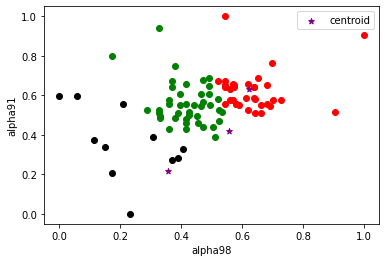

In [71]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.alpha98,df1['alpha91'],color='green')
plt.scatter(df2.alpha98,df2['alpha91'],color='red')
plt.scatter(df3.alpha98,df3['alpha91'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('alpha98')
plt.ylabel('alpha91')
plt.legend()

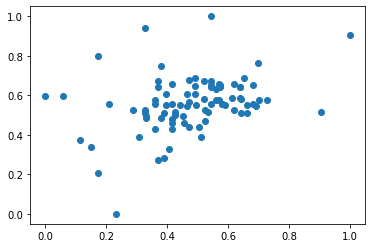

In [73]:
plt.scatter(df.alpha98,df['alpha91'])

<h4 style='color:purple'>Elbow Plot</h4>

In [74]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['alpha91','alpha98']])
    sse.append(km.inertia_)

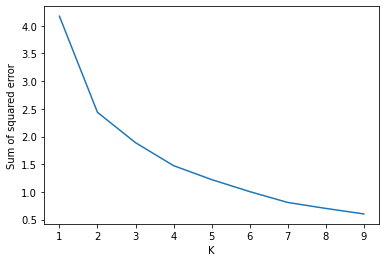

In [75]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)